In [6]:
import tensorflow as tf

from tensorflow import keras
import numpy as np
import importlib
import plotly.express as px

In [9]:
from funcs import data, net, figures, callbacks
importlib.reload(data)
importlib.reload(net)
importlib.reload(figures)
importlib.reload(callbacks)
import pandas as pd
from umap import UMAP
import plotly.express as px
from matplotlib import pyplot


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


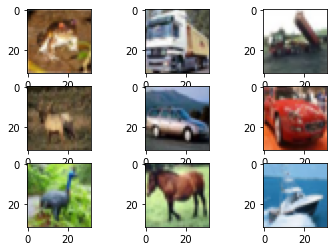

In [11]:
data_name = "cifar10"
(train_images, train_labels), (test_images, test_labels) = data.load_data(data_name = data_name)

print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_images[i])

pyplot.show()

In [12]:
num_kernels=32
num_hidden = 64
intLayerName='secondLast'


In [13]:
model = net.buildModel(data_name=data_name, num_kernels=num_kernels, num_hidden=num_hidden,intLayerName=intLayerName)
modelInter=net.getInterOutModel(model,intLayerName)

2022-06-21 11:11:32.843273: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10890 MB memory:  -> device: 0, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:03:00.0, compute capability: 6.1


In [7]:
intOutputs=modelInter(test_images)
df = pd.DataFrame( data=intOutputs)

classColumnName="classNames"
df[classColumnName] = test_labels


2022-06-21 09:17:12.945847: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


In [8]:
features = df.loc[:, :classColumnName]
umap_3d = UMAP(n_components=3)
proj_3d = umap_3d.fit_transform(features)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
color = df.classNames
)
fig_3d.update_traces(marker_size=5)

fig_3d.show()

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
model = net.buildModel(data_name=data_name, num_kernels=num_kernels, num_hidden=num_hidden,intLayerName=intLayerName)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
net.fitModel(train_images, train_labels, num_epochs=30, model=model, use_cb=False, run_name="umap trial")
modelInter=net.getInterOutModel(model,intLayerName)

Epoch 1/30
1250/1250 [==============================] - 12s 9ms/step - loss: 2.0759 - accuracy: 0.2862 - val_loss: 1.5624 - val_accuracy: 0.4279
Epoch 2/30
1250/1250 [==============================] - 9s 8ms/step - loss: 1.4897 - accuracy: 0.4594 - val_loss: 1.3808 - val_accuracy: 0.5057
Epoch 3/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3094 - accuracy: 0.5359 - val_loss: 1.3302 - val_accuracy: 0.5385
Epoch 4/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1779 - accuracy: 0.5851 - val_loss: 1.2155 - val_accuracy: 0.5855
Epoch 5/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0748 - accuracy: 0.6234 - val_loss: 1.1569 - val_accuracy: 0.6033
Epoch 6/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9983 - accuracy: 0.6508 - val_loss: 1.1359 - val_accuracy: 0.6117
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9231 - accuracy: 0.6792 - val_loss: 1.1217 - val_acc

In [10]:
intOutputs=modelInter(test_images)
df = pd.DataFrame( data=intOutputs)

classColumnName="classNames"
df[classColumnName] = test_labels


In [11]:
features = df.loc[:, :classColumnName]
umap_3d = UMAP(n_components=3)
proj_3d = umap_3d.fit_transform(features)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
color = df.classNames
)
fig_3d.update_traces(marker_size=5)

fig_3d.show()